## Early Detection of Prostate Cancer

**By**

### JATAU ABEL

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# path = '/content/drive/My Drive/Colab Notebooks/'

# data_df = pd.read_csv(path +'creditcard.csv')
data_df = pd.read_csv('Prostate_Cancer.csv')

In [3]:
data_df.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [4]:
print("The credit card fraud detection data has: \n","\n Rows = ",data_df.shape[0],"\n \n Columns = ",data_df.shape[1])

# this is to show us the number of rows and columns that are in the dataset

The credit card fraud detection data has: 
 
 Rows =  100 
 
 Columns =  10


In [5]:
data_df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [6]:
data_df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [7]:
data_df.duplicated().sum()

0

In [8]:
# we have two classes

data_df["diagnosis_result"].unique()

array(['M', 'B'], dtype=object)

In [9]:
data_df["diagnosis_result"].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [10]:
new_data = data_df
new_data.shape

(100, 10)

In [11]:
new_data["diagnosis_result"].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new_data['diagnosis_result'] = le.fit_transform(new_data['diagnosis_result'])

In [13]:
new_data["diagnosis_result"].value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

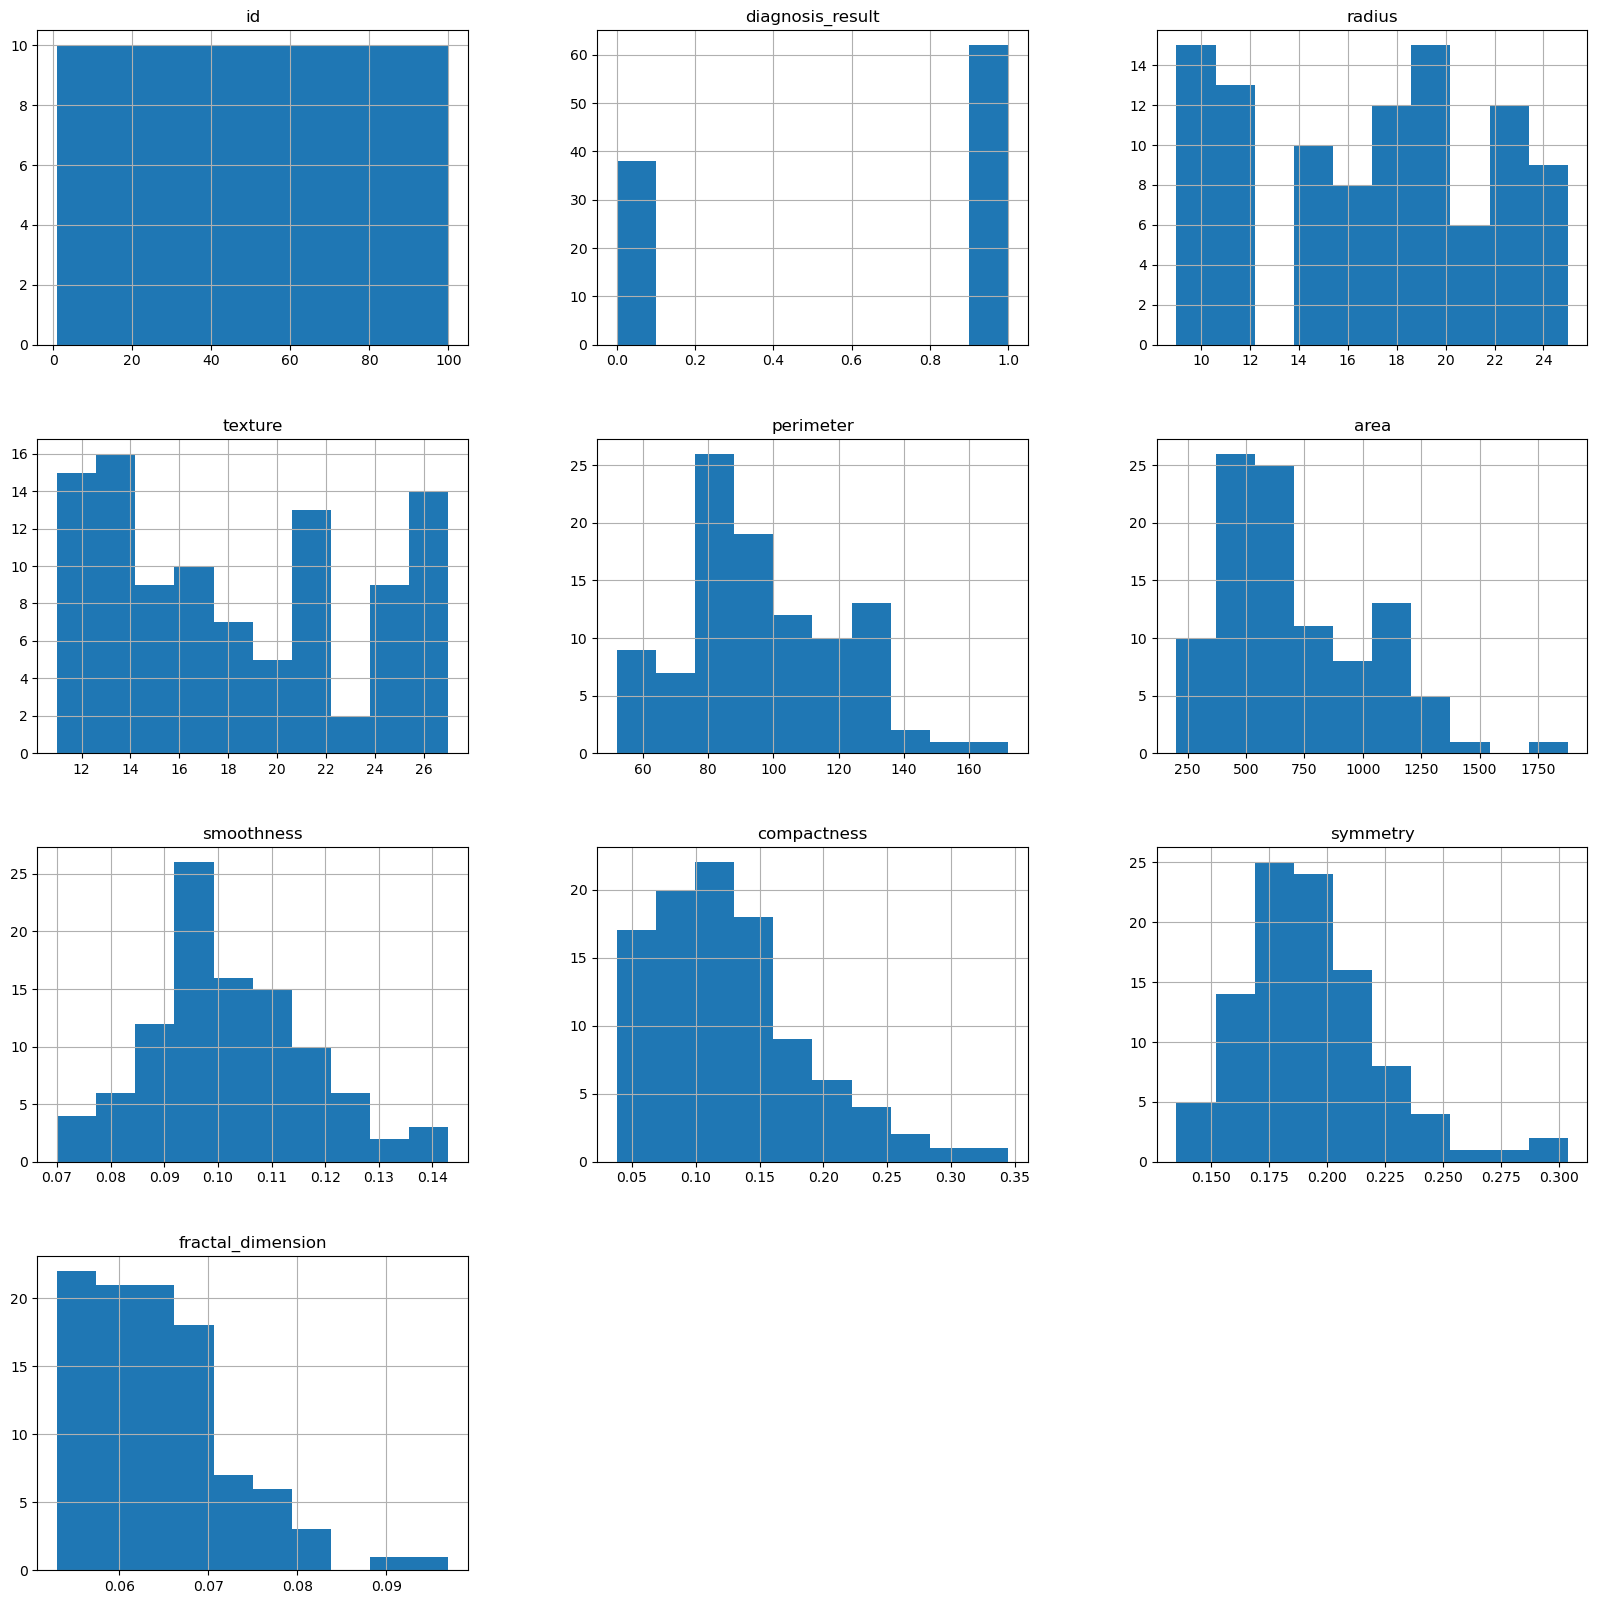

In [14]:
#Now we plot a histogram of individual features in the dataset
new_data.hist(figsize=(20,20))
plt.show()

In [15]:
#Checking the distribution of target variable
fraudulent=new_data[new_data.diagnosis_result==1] #Malignant
nonfraudulent=new_data[new_data.diagnosis_result==0] # Benign

In [16]:
#checking percentage of fraudulent
percentage_fraudulent=(len(fraudulent)*100)/len(new_data)
print(percentage_fraudulent)

print('Malignant cases: ',len(fraudulent))

62.0
Malignant cases:  62


In [17]:
#checking percentage of non-fraudulent
percentage_nonfraudulent=(len(nonfraudulent)*100)/len(new_data)
print(percentage_nonfraudulent)

print('Benign cases: ',len(nonfraudulent))

38.0
Benign cases:  38


C:\Users\SHOPINVERSE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


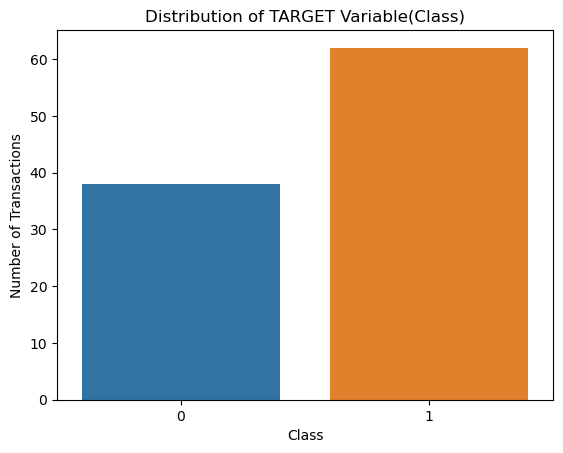

In [18]:
sns.countplot(new_data.diagnosis_result)
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.title("Distribution of TARGET Variable(Class)")
plt.show()

In [19]:
data_df["diagnosis_result"].value_counts()[:]

1    62
0    38
Name: diagnosis_result, dtype: int64

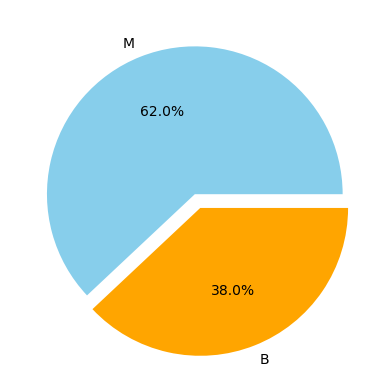

In [20]:
plt.pie(data_df["diagnosis_result"].value_counts(), labels= ['M', 'B'], 
        autopct ="%1.1f%%", colors = ['skyblue','orange'], explode=[0.0, 0.1])
plt.show()

[]

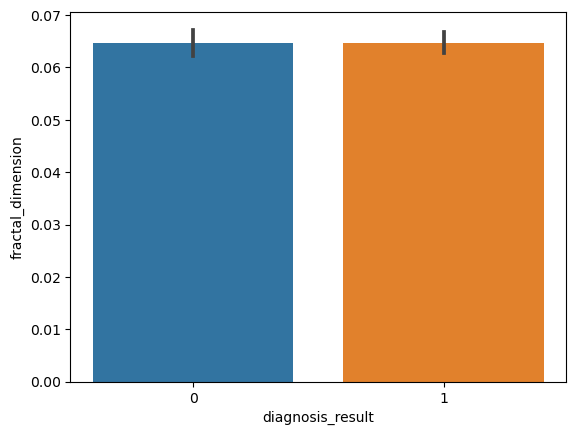

In [21]:
sns.barplot(x = 'diagnosis_result', y = 'fractal_dimension', data = new_data)
plt.plot()

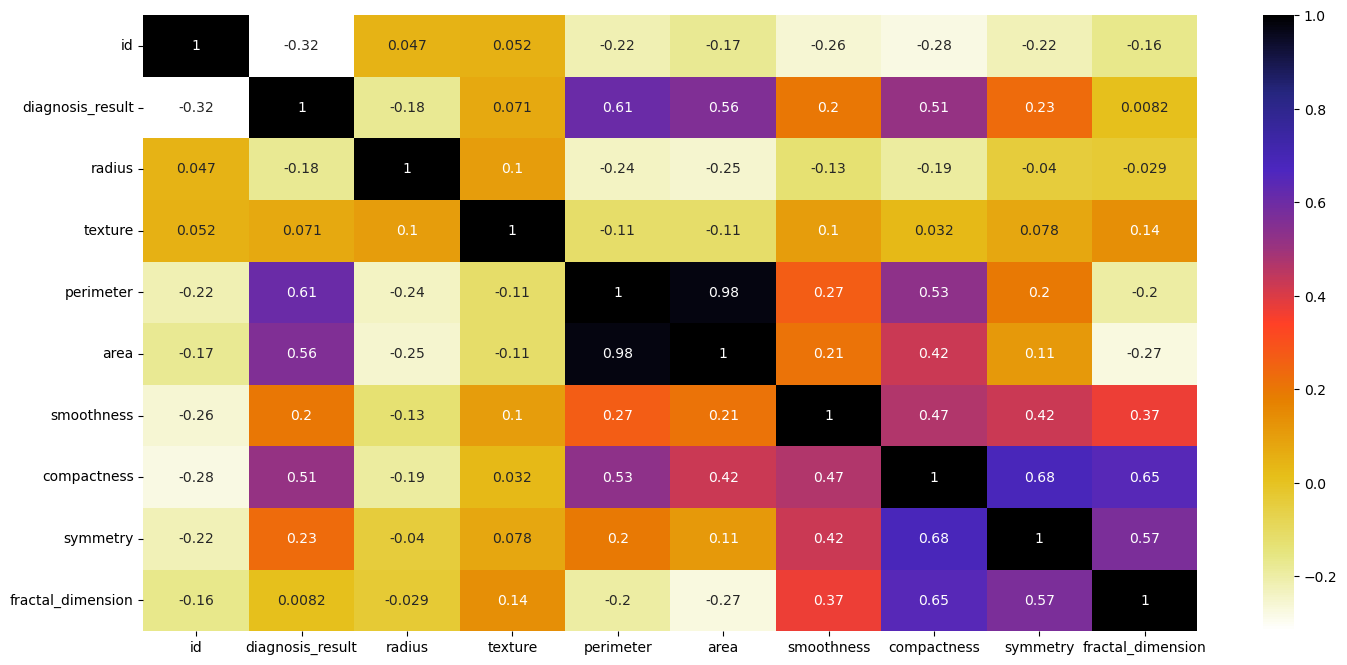

In [23]:
plt.figure(figsize=(17,8))
corr = new_data.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
x = new_data.drop(['id','diagnosis_result'], axis = 1)
y = new_data['diagnosis_result'] 

In [25]:
print(x.shape)
print(y.shape)

(100, 8)
(100,)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#We will split our dataset (Features (X) and Label (Y)) into training and test data by 
#using train_test_split() function from the sklearn. 
#The training set will be 90% while the test set will be 10%, that is why test_size=0.1. 
#the random_state ensure that the split that you generate are reproducible and the random numbers are generated in the same 
# order 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1,stratify = y, random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 8)
(10, 8)
(90,)
(10,)


In [29]:
!pip install lightgbm

In [30]:
#Let's train a Logistic regression model with our training data. 
#We need to import the Logistic regression from the sklearn model.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [31]:
#We now create an object of class LogisticRegression() to train the model on

RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
DTC = DecisionTreeClassifier()
LGBMC = LGBMClassifier()
CBC = CatBoostClassifier()

In [32]:
#Now we sre fitting our training set, this is where the main training process of our model takes place, after which, it is ready
#to make prerdiction


RFC.fit(x_train, y_train)

GBC.fit(x_train, y_train)

DTC.fit(x_train, y_train)

LGBMC.fit(x_train, y_train)

CBC.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 56, number of negative: 34
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.622222 -> initscore=0.498991
[LightGBM] [Info] Start training from score 0.498991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

109:	learn: 0.4397826	total: 383ms	remaining: 3.1s
110:	learn: 0.4379368	total: 385ms	remaining: 3.08s
111:	learn: 0.4361803	total: 387ms	remaining: 3.07s
112:	learn: 0.4343750	total: 389ms	remaining: 3.06s
113:	learn: 0.4328223	total: 391ms	remaining: 3.04s
114:	learn: 0.4310686	total: 393ms	remaining: 3.03s
115:	learn: 0.4296363	total: 395ms	remaining: 3.01s
116:	learn: 0.4287410	total: 397ms	remaining: 3s
117:	learn: 0.4271472	total: 399ms	remaining: 2.98s
118:	learn: 0.4258477	total: 401ms	remaining: 2.97s
119:	learn: 0.4244703	total: 403ms	remaining: 2.95s
120:	learn: 0.4235764	total: 408ms	remaining: 2.96s
121:	learn: 0.4217933	total: 410ms	remaining: 2.95s
122:	learn: 0.4204350	total: 412ms	remaining: 2.94s
123:	learn: 0.4192882	total: 414ms	remaining: 2.92s
124:	learn: 0.4179540	total: 415ms	remaining: 2.91s
125:	learn: 0.4162738	total: 417ms	remaining: 2.89s
126:	learn: 0.4147378	total: 419ms	remaining: 2.88s
127:	learn: 0.4134511	total: 421ms	remaining: 2.86s
128:	learn: 0.41

321:	learn: 0.2452389	total: 761ms	remaining: 1.6s
322:	learn: 0.2447802	total: 763ms	remaining: 1.6s
323:	learn: 0.2442032	total: 765ms	remaining: 1.59s
324:	learn: 0.2437198	total: 767ms	remaining: 1.59s
325:	learn: 0.2431937	total: 768ms	remaining: 1.59s
326:	learn: 0.2428260	total: 771ms	remaining: 1.59s
327:	learn: 0.2423413	total: 773ms	remaining: 1.58s
328:	learn: 0.2417338	total: 774ms	remaining: 1.58s
329:	learn: 0.2412923	total: 776ms	remaining: 1.57s
330:	learn: 0.2410089	total: 778ms	remaining: 1.57s
331:	learn: 0.2405234	total: 780ms	remaining: 1.57s
332:	learn: 0.2399924	total: 781ms	remaining: 1.56s
333:	learn: 0.2393664	total: 783ms	remaining: 1.56s
334:	learn: 0.2390525	total: 814ms	remaining: 1.61s
335:	learn: 0.2385158	total: 816ms	remaining: 1.61s
336:	learn: 0.2381083	total: 823ms	remaining: 1.62s
337:	learn: 0.2376881	total: 825ms	remaining: 1.61s
338:	learn: 0.2372309	total: 827ms	remaining: 1.61s
339:	learn: 0.2368027	total: 830ms	remaining: 1.61s
340:	learn: 0.

517:	learn: 0.1754190	total: 1.14s	remaining: 1.06s
518:	learn: 0.1751661	total: 1.14s	remaining: 1.06s
519:	learn: 0.1749868	total: 1.14s	remaining: 1.06s
520:	learn: 0.1747182	total: 1.15s	remaining: 1.05s
521:	learn: 0.1744770	total: 1.15s	remaining: 1.05s
522:	learn: 0.1742426	total: 1.15s	remaining: 1.05s
523:	learn: 0.1739768	total: 1.15s	remaining: 1.04s
524:	learn: 0.1736129	total: 1.15s	remaining: 1.04s
525:	learn: 0.1733238	total: 1.16s	remaining: 1.04s
526:	learn: 0.1730363	total: 1.16s	remaining: 1.04s
527:	learn: 0.1728507	total: 1.16s	remaining: 1.04s
528:	learn: 0.1726426	total: 1.16s	remaining: 1.03s
529:	learn: 0.1724088	total: 1.16s	remaining: 1.03s
530:	learn: 0.1722377	total: 1.17s	remaining: 1.03s
531:	learn: 0.1719365	total: 1.17s	remaining: 1.03s
532:	learn: 0.1716609	total: 1.17s	remaining: 1.02s
533:	learn: 0.1714304	total: 1.17s	remaining: 1.02s
534:	learn: 0.1712553	total: 1.17s	remaining: 1.02s
535:	learn: 0.1710383	total: 1.17s	remaining: 1.02s
536:	learn: 

732:	learn: 0.1323754	total: 1.51s	remaining: 551ms
733:	learn: 0.1322868	total: 1.52s	remaining: 550ms
734:	learn: 0.1320990	total: 1.52s	remaining: 547ms
735:	learn: 0.1318927	total: 1.52s	remaining: 545ms
736:	learn: 0.1316695	total: 1.52s	remaining: 543ms
737:	learn: 0.1315572	total: 1.52s	remaining: 541ms
738:	learn: 0.1313151	total: 1.52s	remaining: 539ms
739:	learn: 0.1311163	total: 1.53s	remaining: 537ms
740:	learn: 0.1309622	total: 1.53s	remaining: 534ms
741:	learn: 0.1306959	total: 1.53s	remaining: 532ms
742:	learn: 0.1305739	total: 1.53s	remaining: 530ms
743:	learn: 0.1304125	total: 1.53s	remaining: 528ms
744:	learn: 0.1301453	total: 1.54s	remaining: 526ms
745:	learn: 0.1299441	total: 1.54s	remaining: 524ms
746:	learn: 0.1298129	total: 1.54s	remaining: 522ms
747:	learn: 0.1296800	total: 1.54s	remaining: 520ms
748:	learn: 0.1295361	total: 1.54s	remaining: 518ms
749:	learn: 0.1293709	total: 1.55s	remaining: 516ms
750:	learn: 0.1291584	total: 1.55s	remaining: 513ms
751:	learn: 

942:	learn: 0.1030899	total: 1.89s	remaining: 114ms
943:	learn: 0.1029971	total: 1.89s	remaining: 112ms
944:	learn: 0.1027937	total: 1.89s	remaining: 110ms
945:	learn: 0.1027282	total: 1.9s	remaining: 108ms
946:	learn: 0.1026207	total: 1.9s	remaining: 106ms
947:	learn: 0.1024707	total: 1.9s	remaining: 104ms
948:	learn: 0.1023462	total: 1.9s	remaining: 102ms
949:	learn: 0.1022330	total: 1.9s	remaining: 100ms
950:	learn: 0.1021064	total: 1.91s	remaining: 98.2ms
951:	learn: 0.1019959	total: 1.91s	remaining: 96.2ms
952:	learn: 0.1018901	total: 1.91s	remaining: 94.2ms
953:	learn: 0.1017256	total: 1.91s	remaining: 92.2ms
954:	learn: 0.1016316	total: 1.92s	remaining: 90.3ms
955:	learn: 0.1015513	total: 1.92s	remaining: 88.3ms
956:	learn: 0.1014155	total: 1.92s	remaining: 86.3ms
957:	learn: 0.1013041	total: 1.92s	remaining: 84.3ms
958:	learn: 0.1012390	total: 1.92s	remaining: 82.3ms
959:	learn: 0.1011609	total: 1.93s	remaining: 80.2ms
960:	learn: 0.1010738	total: 1.93s	remaining: 78.2ms
961:	l

In [33]:
#The model is now ready to make prediction for the unknown label by using only the features from the test data (X_test).


RFC_prediction = RFC.predict(x_test)

GBC_prediction = GBC.predict(x_test)

DTC_prediction = DTC.predict(x_test)

LGBMC_prediction = LGBMC.predict(x_test)

CBC_prediction = CBC.predict(x_test)



RFC_x_train_prediction = RFC.predict(x_train)

GBC_x_train_prediction = GBC.predict(x_train)

DTC_x_train_prediction = DTC.predict(x_train)

LGBMC_x_train_prediction = LGBMC.predict(x_train)

CBC_x_train_prediction = CBC.predict(x_train)



RFC_prediction

GBC_prediction

DTC_prediction

LGBMC_prediction

CBC_prediction

# the line of code will output an array of the prediction, i.e. 1 for Fraud and 0 for Non-Fraud

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [34]:
# This is the line of code we will use to check for the accuracy of the prediction made by our model

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score #these are the metrics we are going to use to determine how 
#successful we are in our outlier detection


In [35]:
accuracy_RFC= metrics.accuracy_score(y_test, RFC_prediction)

score_1 = roc_auc_score(y_test, RFC_prediction)

f1_score_1 = metrics.f1_score(y_test, RFC_prediction)



accuracy_GBC= metrics.accuracy_score(y_test, GBC_prediction)

score_2 = roc_auc_score(y_test, GBC_prediction)

f1_score_2 = metrics.f1_score(y_test, GBC_prediction)



accuracy_DTC= metrics.accuracy_score(y_test, DTC_prediction)

score_3 = roc_auc_score(y_test, DTC_prediction)

f1_score_3 = metrics.f1_score(y_test, DTC_prediction)



accuracy_LGBMC= metrics.accuracy_score(y_test, LGBMC_prediction)

score_4 = roc_auc_score(y_test, LGBMC_prediction)

f1_score_4 = metrics.f1_score(y_test, LGBMC_prediction)



accuracy_CBC= metrics.accuracy_score(y_test, CBC_prediction)

score_5 = roc_auc_score(y_test, CBC_prediction)

f1_score_5 = metrics.f1_score(y_test, CBC_prediction)

In [36]:
# Now to print our training set and testing set accuracy:

print('Test accuracy for RFC: ',accuracy_RFC, '\n')

print('Train accuracy for RFC: ',accuracy_score(y_train,RFC_x_train_prediction), '\n')

print('ROC_AUC_Score: ',score_1, '\n')

print('F1 Score: ',f1_score_1, '\n')

print(classification_report(y_test, RFC_prediction))

print('<-------------------------------------------->','\n'*2)



print('Test accuracy for GBC: ',accuracy_GBC, '\n')

print('Train accuracy for GBC: ',accuracy_score(y_train,RFC_x_train_prediction),'\n')

print('ROC_AUC_Score: ',score_2, '\n')

print('F1 Score: ',f1_score_2, '\n')

print(classification_report(y_test, GBC_prediction))

print('<-------------------------------------------->','\n'*2)




print('Test accuracy for DTC: ',accuracy_DTC, '\n')

print('Train accuracy for DTC: ',accuracy_score(y_train,DTC_x_train_prediction), '\n')

print('ROC_AUC_Score: ',score_3, '\n')

print('F1 Score: ',f1_score_3, '\n')

print(classification_report(y_test, DTC_prediction))

print('<-------------------------------------------->','\n'*2)



print('Test accuracy for LGBMC: ',accuracy_LGBMC, '\n')

print('Train accuracy for LGBMC: ',accuracy_score(y_train,LGBMC_x_train_prediction), '\n')

print('ROC_AUC_Score: ',score_4, '\n')

print('F1 Score: ',f1_score_4, '\n')

print(classification_report(y_test, LGBMC_prediction))

print('<-------------------------------------------->','\n'*2)



print('Test accuracy for CBC: ',accuracy_CBC, '\n')

print('Train accuracy for CBC: ',accuracy_score(y_train,CBC_x_train_prediction), '\n')

print('ROC_AUC_Score: ',score_5, '\n')

print('F1 Score: ',f1_score_5, '\n')

print(classification_report(y_test, CBC_prediction))

print('<-------------------------------------------->','\n'*2)

Test accuracy for RFC:  0.9 

Train accuracy for RFC:  1.0 

ROC_AUC_Score:  0.875 

F1 Score:  0.923076923076923 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

<--------------------------------------------> 


Test accuracy for GBC:  0.8 

Train accuracy for GBC:  1.0 

ROC_AUC_Score:  0.8333333333333333 

F1 Score:  0.8 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10

<--------------------------------------------> 


Test accuracy f

## Let's Visualize and Compare the Performance of the three Models.

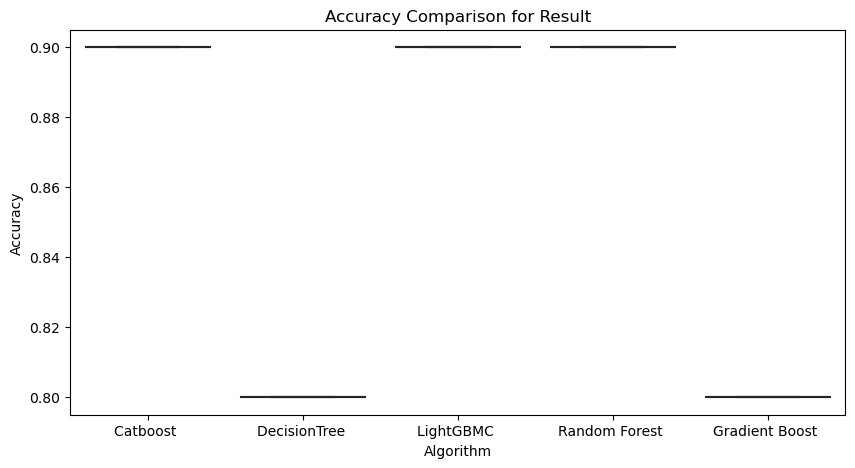

In [37]:
acc = []
model = []

#Let us store the models and their accuracy score in the empyt lists we created

acc.append(accuracy_CBC)
model.append('Catboost ')


acc.append(accuracy_DTC)
model.append('DecisionTree ')

acc.append(accuracy_LGBMC)
model.append('LightGBMC ')

acc.append(accuracy_RFC)
model.append('Random Forest ')

acc.append(accuracy_GBC)
model.append('Gradient Boost ')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison for Result')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.boxplot(y = acc,x = model,palette='dark')
plt.show()

In [38]:
# Define estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


estimators = [
    ('GBC', GBC),
    ('RFC', RFC),
    ('CBC', CBC),
    ('DTC', DTC),
    ('LGBMC', LGBMC)
]

# Build stack model
stack_model = StackingClassifier(
        estimators = estimators, final_estimator = LogisticRegression()
)

# train stacked model
stack_model.fit(x_train,y_train)

#make predictions
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

#Training set model performance
stack_model_train_accuracy= metrics.accuracy_score(y_train, y_train_pred)
stack_model_train_score = roc_auc_score(y_train, y_train_pred)
stack_model_train_f1_score = metrics.f1_score(y_train, y_train_pred)

#Testin set model performance
stack_model_test_accuracy= metrics.accuracy_score(y_test, y_test_pred)
stack_model_test_score = roc_auc_score(y_test, y_test_pred)
stack_model_test_f1_score = metrics.f1_score(y_test, y_test_pred)



Learning rate set to 0.003685
0:	learn: 0.6893133	total: 2.02ms	remaining: 2.02s
1:	learn: 0.6857448	total: 3.89ms	remaining: 1.94s
2:	learn: 0.6822536	total: 5.59ms	remaining: 1.86s
3:	learn: 0.6798781	total: 7.18ms	remaining: 1.79s
4:	learn: 0.6763972	total: 8.86ms	remaining: 1.76s
5:	learn: 0.6731043	total: 10.4ms	remaining: 1.72s
6:	learn: 0.6696050	total: 12ms	remaining: 1.71s
7:	learn: 0.6659213	total: 13.6ms	remaining: 1.68s
8:	learn: 0.6624720	total: 15.4ms	remaining: 1.7s
9:	learn: 0.6595781	total: 17.1ms	remaining: 1.69s
10:	learn: 0.6567242	total: 18.8ms	remaining: 1.69s
11:	learn: 0.6538284	total: 20.6ms	remaining: 1.69s
12:	learn: 0.6505832	total: 22.3ms	remaining: 1.69s
13:	learn: 0.6482936	total: 23.9ms	remaining: 1.68s
14:	learn: 0.6458228	total: 25.5ms	remaining: 1.68s
15:	learn: 0.6427541	total: 27ms	remaining: 1.66s
16:	learn: 0.6393067	total: 28.7ms	remaining: 1.66s
17:	learn: 0.6367230	total: 30.4ms	remaining: 1.66s
18:	learn: 0.6338698	total: 32ms	remaining: 1.65s

206:	learn: 0.3236597	total: 375ms	remaining: 1.44s
207:	learn: 0.3229017	total: 378ms	remaining: 1.44s
208:	learn: 0.3222628	total: 380ms	remaining: 1.44s
209:	learn: 0.3216343	total: 381ms	remaining: 1.43s
210:	learn: 0.3206968	total: 383ms	remaining: 1.43s
211:	learn: 0.3197501	total: 385ms	remaining: 1.43s
212:	learn: 0.3189319	total: 387ms	remaining: 1.43s
213:	learn: 0.3180080	total: 389ms	remaining: 1.43s
214:	learn: 0.3169429	total: 391ms	remaining: 1.43s
215:	learn: 0.3164847	total: 393ms	remaining: 1.43s
216:	learn: 0.3157414	total: 395ms	remaining: 1.42s
217:	learn: 0.3144767	total: 396ms	remaining: 1.42s
218:	learn: 0.3139427	total: 398ms	remaining: 1.42s
219:	learn: 0.3128938	total: 400ms	remaining: 1.42s
220:	learn: 0.3121153	total: 402ms	remaining: 1.42s
221:	learn: 0.3114430	total: 405ms	remaining: 1.42s
222:	learn: 0.3109415	total: 410ms	remaining: 1.43s
223:	learn: 0.3099858	total: 412ms	remaining: 1.43s
224:	learn: 0.3092488	total: 413ms	remaining: 1.42s
225:	learn: 

416:	learn: 0.2063628	total: 756ms	remaining: 1.06s
417:	learn: 0.2060152	total: 759ms	remaining: 1.06s
418:	learn: 0.2057134	total: 761ms	remaining: 1.05s
419:	learn: 0.2053646	total: 762ms	remaining: 1.05s
420:	learn: 0.2050048	total: 764ms	remaining: 1.05s
421:	learn: 0.2047342	total: 766ms	remaining: 1.05s
422:	learn: 0.2043454	total: 768ms	remaining: 1.05s
423:	learn: 0.2040977	total: 770ms	remaining: 1.05s
424:	learn: 0.2036353	total: 772ms	remaining: 1.04s
425:	learn: 0.2032453	total: 774ms	remaining: 1.04s
426:	learn: 0.2028112	total: 776ms	remaining: 1.04s
427:	learn: 0.2024494	total: 780ms	remaining: 1.04s
428:	learn: 0.2020484	total: 782ms	remaining: 1.04s
429:	learn: 0.2016929	total: 786ms	remaining: 1.04s
430:	learn: 0.2013741	total: 788ms	remaining: 1.04s
431:	learn: 0.2010067	total: 790ms	remaining: 1.04s
432:	learn: 0.2007314	total: 792ms	remaining: 1.04s
433:	learn: 0.2002567	total: 793ms	remaining: 1.03s
434:	learn: 0.1999380	total: 795ms	remaining: 1.03s
435:	learn: 

626:	learn: 0.1510161	total: 1.13s	remaining: 675ms
627:	learn: 0.1508423	total: 1.14s	remaining: 674ms
628:	learn: 0.1505774	total: 1.14s	remaining: 672ms
629:	learn: 0.1503915	total: 1.14s	remaining: 670ms
630:	learn: 0.1501260	total: 1.14s	remaining: 668ms
631:	learn: 0.1499953	total: 1.15s	remaining: 667ms
632:	learn: 0.1497660	total: 1.15s	remaining: 665ms
633:	learn: 0.1495478	total: 1.15s	remaining: 664ms
634:	learn: 0.1493687	total: 1.15s	remaining: 662ms
635:	learn: 0.1492020	total: 1.15s	remaining: 660ms
636:	learn: 0.1490658	total: 1.16s	remaining: 660ms
637:	learn: 0.1488734	total: 1.16s	remaining: 658ms
638:	learn: 0.1486584	total: 1.16s	remaining: 657ms
639:	learn: 0.1484272	total: 1.17s	remaining: 656ms
640:	learn: 0.1481137	total: 1.17s	remaining: 655ms
641:	learn: 0.1479168	total: 1.17s	remaining: 653ms
642:	learn: 0.1476860	total: 1.17s	remaining: 651ms
643:	learn: 0.1474622	total: 1.17s	remaining: 649ms
644:	learn: 0.1472588	total: 1.18s	remaining: 648ms
645:	learn: 

791:	learn: 0.1226146	total: 1.51s	remaining: 397ms
792:	learn: 0.1224327	total: 1.51s	remaining: 395ms
793:	learn: 0.1223297	total: 1.51s	remaining: 393ms
794:	learn: 0.1221095	total: 1.52s	remaining: 391ms
795:	learn: 0.1219685	total: 1.52s	remaining: 389ms
796:	learn: 0.1218230	total: 1.52s	remaining: 387ms
797:	learn: 0.1216048	total: 1.52s	remaining: 385ms
798:	learn: 0.1214440	total: 1.52s	remaining: 383ms
799:	learn: 0.1213380	total: 1.52s	remaining: 381ms
800:	learn: 0.1210841	total: 1.53s	remaining: 380ms
801:	learn: 0.1209522	total: 1.53s	remaining: 378ms
802:	learn: 0.1207908	total: 1.53s	remaining: 376ms
803:	learn: 0.1206893	total: 1.54s	remaining: 374ms
804:	learn: 0.1205698	total: 1.54s	remaining: 372ms
805:	learn: 0.1204692	total: 1.54s	remaining: 371ms
806:	learn: 0.1202605	total: 1.54s	remaining: 369ms
807:	learn: 0.1201612	total: 1.54s	remaining: 367ms
808:	learn: 0.1200345	total: 1.54s	remaining: 365ms
809:	learn: 0.1198800	total: 1.55s	remaining: 363ms
810:	learn: 

[LightGBM] [Info] Number of positive: 56, number of negative: 34
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.622222 -> initscore=0.498991
[LightGBM] [Info] Start training from score 0.498991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

107:	learn: 0.4510895	total: 187ms	remaining: 1.54s
108:	learn: 0.4492217	total: 191ms	remaining: 1.56s
109:	learn: 0.4479659	total: 194ms	remaining: 1.57s
110:	learn: 0.4463065	total: 196ms	remaining: 1.57s
111:	learn: 0.4448128	total: 199ms	remaining: 1.58s
112:	learn: 0.4428023	total: 201ms	remaining: 1.58s
113:	learn: 0.4414039	total: 204ms	remaining: 1.58s
114:	learn: 0.4402964	total: 213ms	remaining: 1.64s
115:	learn: 0.4389721	total: 216ms	remaining: 1.64s
116:	learn: 0.4373569	total: 218ms	remaining: 1.64s
117:	learn: 0.4358148	total: 220ms	remaining: 1.64s
118:	learn: 0.4338358	total: 222ms	remaining: 1.64s
119:	learn: 0.4320668	total: 224ms	remaining: 1.64s
120:	learn: 0.4306130	total: 226ms	remaining: 1.64s
121:	learn: 0.4289476	total: 230ms	remaining: 1.66s
122:	learn: 0.4278762	total: 232ms	remaining: 1.65s
123:	learn: 0.4264233	total: 234ms	remaining: 1.65s
124:	learn: 0.4248667	total: 236ms	remaining: 1.65s
125:	learn: 0.4235463	total: 238ms	remaining: 1.65s
126:	learn: 

313:	learn: 0.2559059	total: 564ms	remaining: 1.23s
314:	learn: 0.2553332	total: 567ms	remaining: 1.23s
315:	learn: 0.2547124	total: 569ms	remaining: 1.23s
316:	learn: 0.2541394	total: 570ms	remaining: 1.23s
317:	learn: 0.2534699	total: 572ms	remaining: 1.23s
318:	learn: 0.2529054	total: 574ms	remaining: 1.23s
319:	learn: 0.2522430	total: 576ms	remaining: 1.22s
320:	learn: 0.2517570	total: 578ms	remaining: 1.22s
321:	learn: 0.2511251	total: 580ms	remaining: 1.22s
322:	learn: 0.2505735	total: 582ms	remaining: 1.22s
323:	learn: 0.2501068	total: 584ms	remaining: 1.22s
324:	learn: 0.2496055	total: 587ms	remaining: 1.22s
325:	learn: 0.2490447	total: 590ms	remaining: 1.22s
326:	learn: 0.2486468	total: 593ms	remaining: 1.22s
327:	learn: 0.2479779	total: 595ms	remaining: 1.22s
328:	learn: 0.2474854	total: 597ms	remaining: 1.22s
329:	learn: 0.2469927	total: 599ms	remaining: 1.22s
330:	learn: 0.2464130	total: 600ms	remaining: 1.21s
331:	learn: 0.2459648	total: 602ms	remaining: 1.21s
332:	learn: 

525:	learn: 0.1721397	total: 942ms	remaining: 849ms
526:	learn: 0.1717918	total: 944ms	remaining: 847ms
527:	learn: 0.1715056	total: 946ms	remaining: 846ms
528:	learn: 0.1712047	total: 948ms	remaining: 844ms
529:	learn: 0.1708761	total: 950ms	remaining: 842ms
530:	learn: 0.1706561	total: 951ms	remaining: 840ms
531:	learn: 0.1704277	total: 954ms	remaining: 839ms
532:	learn: 0.1701128	total: 956ms	remaining: 837ms
533:	learn: 0.1696884	total: 958ms	remaining: 836ms
534:	learn: 0.1693937	total: 960ms	remaining: 834ms
535:	learn: 0.1691623	total: 962ms	remaining: 833ms
536:	learn: 0.1688640	total: 965ms	remaining: 832ms
537:	learn: 0.1685652	total: 967ms	remaining: 830ms
538:	learn: 0.1683127	total: 969ms	remaining: 829ms
539:	learn: 0.1681128	total: 971ms	remaining: 827ms
540:	learn: 0.1678041	total: 973ms	remaining: 826ms
541:	learn: 0.1676300	total: 975ms	remaining: 824ms
542:	learn: 0.1673006	total: 976ms	remaining: 822ms
543:	learn: 0.1670123	total: 978ms	remaining: 820ms
544:	learn: 

739:	learn: 0.1259011	total: 1.32s	remaining: 464ms
740:	learn: 0.1257407	total: 1.32s	remaining: 463ms
741:	learn: 0.1255281	total: 1.32s	remaining: 461ms
742:	learn: 0.1253860	total: 1.33s	remaining: 459ms
743:	learn: 0.1251855	total: 1.33s	remaining: 457ms
744:	learn: 0.1249341	total: 1.33s	remaining: 456ms
745:	learn: 0.1247929	total: 1.33s	remaining: 454ms
746:	learn: 0.1246339	total: 1.33s	remaining: 452ms
747:	learn: 0.1244941	total: 1.34s	remaining: 450ms
748:	learn: 0.1243943	total: 1.34s	remaining: 449ms
749:	learn: 0.1243483	total: 1.34s	remaining: 447ms
750:	learn: 0.1241334	total: 1.34s	remaining: 445ms
751:	learn: 0.1239574	total: 1.34s	remaining: 444ms
752:	learn: 0.1237438	total: 1.35s	remaining: 442ms
753:	learn: 0.1235743	total: 1.35s	remaining: 440ms
754:	learn: 0.1234241	total: 1.35s	remaining: 439ms
755:	learn: 0.1232732	total: 1.35s	remaining: 437ms
756:	learn: 0.1231586	total: 1.35s	remaining: 435ms
757:	learn: 0.1229177	total: 1.36s	remaining: 433ms
758:	learn: 

958:	learn: 0.0949318	total: 1.7s	remaining: 72.7ms
959:	learn: 0.0948529	total: 1.7s	remaining: 71ms
960:	learn: 0.0947731	total: 1.71s	remaining: 69.2ms
961:	learn: 0.0946424	total: 1.71s	remaining: 67.5ms
962:	learn: 0.0945490	total: 1.71s	remaining: 65.7ms
963:	learn: 0.0944388	total: 1.71s	remaining: 63.9ms
964:	learn: 0.0943320	total: 1.71s	remaining: 62.1ms
965:	learn: 0.0942271	total: 1.72s	remaining: 60.4ms
966:	learn: 0.0941653	total: 1.72s	remaining: 58.6ms
967:	learn: 0.0940204	total: 1.72s	remaining: 56.8ms
968:	learn: 0.0938388	total: 1.72s	remaining: 55ms
969:	learn: 0.0937566	total: 1.72s	remaining: 53.3ms
970:	learn: 0.0936536	total: 1.73s	remaining: 51.5ms
971:	learn: 0.0935702	total: 1.73s	remaining: 49.8ms
972:	learn: 0.0934646	total: 1.73s	remaining: 48ms
973:	learn: 0.0933903	total: 1.73s	remaining: 46.2ms
974:	learn: 0.0932327	total: 1.73s	remaining: 44.4ms
975:	learn: 0.0930608	total: 1.73s	remaining: 42.7ms
976:	learn: 0.0929443	total: 1.74s	remaining: 40.9ms
9

143:	learn: 0.3825197	total: 249ms	remaining: 1.48s
144:	learn: 0.3811696	total: 252ms	remaining: 1.48s
145:	learn: 0.3795767	total: 253ms	remaining: 1.48s
146:	learn: 0.3781798	total: 255ms	remaining: 1.48s
147:	learn: 0.3768644	total: 257ms	remaining: 1.48s
148:	learn: 0.3752400	total: 259ms	remaining: 1.48s
149:	learn: 0.3740447	total: 261ms	remaining: 1.48s
150:	learn: 0.3733258	total: 263ms	remaining: 1.48s
151:	learn: 0.3719481	total: 265ms	remaining: 1.48s
152:	learn: 0.3708716	total: 266ms	remaining: 1.48s
153:	learn: 0.3694941	total: 268ms	remaining: 1.47s
154:	learn: 0.3676865	total: 272ms	remaining: 1.48s
155:	learn: 0.3664744	total: 275ms	remaining: 1.49s
156:	learn: 0.3652060	total: 277ms	remaining: 1.49s
157:	learn: 0.3638689	total: 279ms	remaining: 1.48s
158:	learn: 0.3625087	total: 280ms	remaining: 1.48s
159:	learn: 0.3610508	total: 282ms	remaining: 1.48s
160:	learn: 0.3594028	total: 283ms	remaining: 1.48s
161:	learn: 0.3578399	total: 285ms	remaining: 1.47s
162:	learn: 

357:	learn: 0.2085839	total: 619ms	remaining: 1.11s
358:	learn: 0.2082321	total: 621ms	remaining: 1.11s
359:	learn: 0.2077291	total: 624ms	remaining: 1.11s
360:	learn: 0.2071960	total: 625ms	remaining: 1.11s
361:	learn: 0.2066400	total: 627ms	remaining: 1.1s
362:	learn: 0.2060843	total: 629ms	remaining: 1.1s
363:	learn: 0.2057110	total: 631ms	remaining: 1.1s
364:	learn: 0.2052136	total: 633ms	remaining: 1.1s
365:	learn: 0.2046708	total: 634ms	remaining: 1.1s
366:	learn: 0.2040750	total: 636ms	remaining: 1.1s
367:	learn: 0.2037686	total: 639ms	remaining: 1.1s
368:	learn: 0.2032465	total: 640ms	remaining: 1.09s
369:	learn: 0.2028455	total: 643ms	remaining: 1.09s
370:	learn: 0.2022442	total: 645ms	remaining: 1.09s
371:	learn: 0.2018728	total: 647ms	remaining: 1.09s
372:	learn: 0.2014528	total: 650ms	remaining: 1.09s
373:	learn: 0.2009088	total: 651ms	remaining: 1.09s
374:	learn: 0.2003569	total: 654ms	remaining: 1.09s
375:	learn: 0.1998250	total: 655ms	remaining: 1.09s
376:	learn: 0.19937

571:	learn: 0.1347356	total: 995ms	remaining: 744ms
572:	learn: 0.1344412	total: 997ms	remaining: 743ms
573:	learn: 0.1342393	total: 998ms	remaining: 741ms
574:	learn: 0.1338698	total: 1s	remaining: 739ms
575:	learn: 0.1334810	total: 1s	remaining: 738ms
576:	learn: 0.1333164	total: 1s	remaining: 736ms
577:	learn: 0.1330516	total: 1.01s	remaining: 735ms
578:	learn: 0.1328196	total: 1.01s	remaining: 733ms
579:	learn: 0.1325889	total: 1.01s	remaining: 731ms
580:	learn: 0.1324211	total: 1.01s	remaining: 730ms
581:	learn: 0.1321681	total: 1.01s	remaining: 728ms
582:	learn: 0.1318982	total: 1.01s	remaining: 727ms
583:	learn: 0.1317304	total: 1.02s	remaining: 726ms
584:	learn: 0.1315725	total: 1.02s	remaining: 724ms
585:	learn: 0.1314243	total: 1.02s	remaining: 723ms
586:	learn: 0.1312356	total: 1.02s	remaining: 721ms
587:	learn: 0.1310232	total: 1.02s	remaining: 719ms
588:	learn: 0.1308657	total: 1.03s	remaining: 717ms
589:	learn: 0.1305665	total: 1.03s	remaining: 715ms
590:	learn: 0.1304294

791:	learn: 0.0951489	total: 1.38s	remaining: 363ms
792:	learn: 0.0950452	total: 1.38s	remaining: 361ms
793:	learn: 0.0948469	total: 1.38s	remaining: 359ms
794:	learn: 0.0947035	total: 1.39s	remaining: 358ms
795:	learn: 0.0945851	total: 1.39s	remaining: 356ms
796:	learn: 0.0944255	total: 1.39s	remaining: 354ms
797:	learn: 0.0942904	total: 1.39s	remaining: 352ms
798:	learn: 0.0941713	total: 1.39s	remaining: 351ms
799:	learn: 0.0940607	total: 1.4s	remaining: 349ms
800:	learn: 0.0939101	total: 1.4s	remaining: 347ms
801:	learn: 0.0937858	total: 1.4s	remaining: 345ms
802:	learn: 0.0936766	total: 1.4s	remaining: 344ms
803:	learn: 0.0935835	total: 1.4s	remaining: 342ms
804:	learn: 0.0934507	total: 1.41s	remaining: 341ms
805:	learn: 0.0933147	total: 1.41s	remaining: 339ms
806:	learn: 0.0932090	total: 1.41s	remaining: 337ms
807:	learn: 0.0930703	total: 1.41s	remaining: 335ms
808:	learn: 0.0929484	total: 1.41s	remaining: 334ms
809:	learn: 0.0927827	total: 1.42s	remaining: 332ms
810:	learn: 0.092

Learning rate set to 0.00335
0:	learn: 0.6906446	total: 2.37ms	remaining: 2.37s
1:	learn: 0.6879445	total: 4.17ms	remaining: 2.08s
2:	learn: 0.6857764	total: 5.74ms	remaining: 1.91s
3:	learn: 0.6836635	total: 7.25ms	remaining: 1.8s
4:	learn: 0.6808000	total: 8.78ms	remaining: 1.75s
5:	learn: 0.6788617	total: 10.3ms	remaining: 1.71s
6:	learn: 0.6754679	total: 11.9ms	remaining: 1.69s
7:	learn: 0.6730773	total: 13.8ms	remaining: 1.71s
8:	learn: 0.6708117	total: 15.7ms	remaining: 1.73s
9:	learn: 0.6683949	total: 17.3ms	remaining: 1.72s
10:	learn: 0.6660529	total: 18.9ms	remaining: 1.7s
11:	learn: 0.6640549	total: 20.5ms	remaining: 1.68s
12:	learn: 0.6614592	total: 22ms	remaining: 1.67s
13:	learn: 0.6593219	total: 23.5ms	remaining: 1.66s
14:	learn: 0.6572607	total: 25.1ms	remaining: 1.65s
15:	learn: 0.6547510	total: 26.7ms	remaining: 1.64s
16:	learn: 0.6520710	total: 28.4ms	remaining: 1.64s
17:	learn: 0.6499536	total: 30.2ms	remaining: 1.65s
18:	learn: 0.6469661	total: 31.7ms	remaining: 1.6

232:	learn: 0.3486362	total: 380ms	remaining: 1.25s
233:	learn: 0.3476794	total: 382ms	remaining: 1.25s
234:	learn: 0.3468593	total: 384ms	remaining: 1.25s
235:	learn: 0.3463032	total: 386ms	remaining: 1.25s
236:	learn: 0.3457218	total: 387ms	remaining: 1.25s
237:	learn: 0.3449352	total: 389ms	remaining: 1.25s
238:	learn: 0.3440340	total: 391ms	remaining: 1.24s
239:	learn: 0.3432955	total: 393ms	remaining: 1.24s
240:	learn: 0.3424923	total: 395ms	remaining: 1.24s
241:	learn: 0.3417396	total: 397ms	remaining: 1.24s
242:	learn: 0.3408670	total: 399ms	remaining: 1.24s
243:	learn: 0.3397825	total: 400ms	remaining: 1.24s
244:	learn: 0.3389814	total: 402ms	remaining: 1.24s
245:	learn: 0.3381578	total: 404ms	remaining: 1.24s
246:	learn: 0.3372205	total: 407ms	remaining: 1.24s
247:	learn: 0.3366572	total: 409ms	remaining: 1.24s
248:	learn: 0.3360133	total: 412ms	remaining: 1.24s
249:	learn: 0.3354784	total: 414ms	remaining: 1.24s
250:	learn: 0.3347324	total: 415ms	remaining: 1.24s
251:	learn: 

458:	learn: 0.2279525	total: 757ms	remaining: 893ms
459:	learn: 0.2274203	total: 761ms	remaining: 893ms
460:	learn: 0.2270981	total: 762ms	remaining: 891ms
461:	learn: 0.2268101	total: 764ms	remaining: 890ms
462:	learn: 0.2262977	total: 766ms	remaining: 888ms
463:	learn: 0.2259719	total: 768ms	remaining: 887ms
464:	learn: 0.2254618	total: 769ms	remaining: 885ms
465:	learn: 0.2251407	total: 771ms	remaining: 884ms
466:	learn: 0.2248430	total: 773ms	remaining: 882ms
467:	learn: 0.2244183	total: 775ms	remaining: 881ms
468:	learn: 0.2240163	total: 777ms	remaining: 879ms
469:	learn: 0.2234844	total: 779ms	remaining: 878ms
470:	learn: 0.2230566	total: 780ms	remaining: 876ms
471:	learn: 0.2226577	total: 782ms	remaining: 875ms
472:	learn: 0.2224360	total: 785ms	remaining: 874ms
473:	learn: 0.2220943	total: 787ms	remaining: 873ms
474:	learn: 0.2215718	total: 789ms	remaining: 872ms
475:	learn: 0.2212883	total: 791ms	remaining: 871ms
476:	learn: 0.2208597	total: 793ms	remaining: 869ms
477:	learn: 

673:	learn: 0.1688874	total: 1.13s	remaining: 548ms
674:	learn: 0.1686686	total: 1.14s	remaining: 548ms
675:	learn: 0.1684260	total: 1.14s	remaining: 546ms
676:	learn: 0.1681222	total: 1.14s	remaining: 545ms
677:	learn: 0.1679463	total: 1.14s	remaining: 543ms
678:	learn: 0.1677043	total: 1.15s	remaining: 542ms
679:	learn: 0.1675266	total: 1.15s	remaining: 540ms
680:	learn: 0.1673622	total: 1.15s	remaining: 538ms
681:	learn: 0.1671560	total: 1.15s	remaining: 537ms
682:	learn: 0.1670594	total: 1.15s	remaining: 535ms
683:	learn: 0.1669121	total: 1.16s	remaining: 534ms
684:	learn: 0.1667652	total: 1.16s	remaining: 532ms
685:	learn: 0.1666980	total: 1.16s	remaining: 531ms
686:	learn: 0.1665255	total: 1.16s	remaining: 529ms
687:	learn: 0.1663392	total: 1.16s	remaining: 528ms
688:	learn: 0.1660095	total: 1.17s	remaining: 526ms
689:	learn: 0.1657729	total: 1.17s	remaining: 525ms
690:	learn: 0.1655816	total: 1.17s	remaining: 523ms
691:	learn: 0.1652842	total: 1.17s	remaining: 522ms
692:	learn: 

873:	learn: 0.1322818	total: 1.5s	remaining: 216ms
874:	learn: 0.1321829	total: 1.5s	remaining: 215ms
875:	learn: 0.1319986	total: 1.5s	remaining: 213ms
876:	learn: 0.1318044	total: 1.5s	remaining: 211ms
877:	learn: 0.1317369	total: 1.51s	remaining: 210ms
878:	learn: 0.1314991	total: 1.51s	remaining: 208ms
879:	learn: 0.1313675	total: 1.51s	remaining: 206ms
880:	learn: 0.1312375	total: 1.51s	remaining: 204ms
881:	learn: 0.1311412	total: 1.51s	remaining: 203ms
882:	learn: 0.1310096	total: 1.52s	remaining: 201ms
883:	learn: 0.1307878	total: 1.52s	remaining: 199ms
884:	learn: 0.1305983	total: 1.52s	remaining: 198ms
885:	learn: 0.1304217	total: 1.52s	remaining: 196ms
886:	learn: 0.1303005	total: 1.53s	remaining: 194ms
887:	learn: 0.1300452	total: 1.53s	remaining: 193ms
888:	learn: 0.1298605	total: 1.53s	remaining: 191ms
889:	learn: 0.1297741	total: 1.53s	remaining: 189ms
890:	learn: 0.1296211	total: 1.53s	remaining: 188ms
891:	learn: 0.1295376	total: 1.53s	remaining: 186ms
892:	learn: 0.12

69:	learn: 0.5184493	total: 115ms	remaining: 1.52s
70:	learn: 0.5164475	total: 117ms	remaining: 1.54s
71:	learn: 0.5144566	total: 119ms	remaining: 1.54s
72:	learn: 0.5125224	total: 121ms	remaining: 1.54s
73:	learn: 0.5104197	total: 123ms	remaining: 1.53s
74:	learn: 0.5082583	total: 125ms	remaining: 1.53s
75:	learn: 0.5061288	total: 126ms	remaining: 1.54s
76:	learn: 0.5036466	total: 128ms	remaining: 1.54s
77:	learn: 0.5021068	total: 130ms	remaining: 1.54s
78:	learn: 0.5001137	total: 132ms	remaining: 1.54s
79:	learn: 0.4986449	total: 134ms	remaining: 1.54s
80:	learn: 0.4968676	total: 135ms	remaining: 1.54s
81:	learn: 0.4949878	total: 138ms	remaining: 1.54s
82:	learn: 0.4930061	total: 140ms	remaining: 1.54s
83:	learn: 0.4911902	total: 169ms	remaining: 1.85s
84:	learn: 0.4896070	total: 171ms	remaining: 1.84s
85:	learn: 0.4874730	total: 173ms	remaining: 1.84s
86:	learn: 0.4854637	total: 175ms	remaining: 1.83s
87:	learn: 0.4836061	total: 185ms	remaining: 1.92s
88:	learn: 0.4819004	total: 187

268:	learn: 0.2784328	total: 494ms	remaining: 1.34s
269:	learn: 0.2777627	total: 496ms	remaining: 1.34s
270:	learn: 0.2768795	total: 498ms	remaining: 1.34s
271:	learn: 0.2761358	total: 500ms	remaining: 1.34s
272:	learn: 0.2755298	total: 502ms	remaining: 1.33s
273:	learn: 0.2747993	total: 503ms	remaining: 1.33s
274:	learn: 0.2741550	total: 505ms	remaining: 1.33s
275:	learn: 0.2734439	total: 507ms	remaining: 1.33s
276:	learn: 0.2727265	total: 508ms	remaining: 1.33s
277:	learn: 0.2719871	total: 511ms	remaining: 1.33s
278:	learn: 0.2711607	total: 513ms	remaining: 1.32s
279:	learn: 0.2705704	total: 514ms	remaining: 1.32s
280:	learn: 0.2699704	total: 516ms	remaining: 1.32s
281:	learn: 0.2692355	total: 519ms	remaining: 1.32s
282:	learn: 0.2682983	total: 521ms	remaining: 1.32s
283:	learn: 0.2676986	total: 524ms	remaining: 1.32s
284:	learn: 0.2670021	total: 526ms	remaining: 1.32s
285:	learn: 0.2665612	total: 527ms	remaining: 1.32s
286:	learn: 0.2659687	total: 529ms	remaining: 1.31s
287:	learn: 

488:	learn: 0.1736604	total: 870ms	remaining: 909ms
489:	learn: 0.1734086	total: 872ms	remaining: 908ms
490:	learn: 0.1730694	total: 874ms	remaining: 906ms
491:	learn: 0.1727906	total: 876ms	remaining: 904ms
492:	learn: 0.1725423	total: 878ms	remaining: 903ms
493:	learn: 0.1722275	total: 879ms	remaining: 901ms
494:	learn: 0.1718343	total: 881ms	remaining: 899ms
495:	learn: 0.1714829	total: 883ms	remaining: 897ms
496:	learn: 0.1712292	total: 885ms	remaining: 896ms
497:	learn: 0.1707328	total: 887ms	remaining: 894ms
498:	learn: 0.1703867	total: 889ms	remaining: 893ms
499:	learn: 0.1700413	total: 891ms	remaining: 891ms
500:	learn: 0.1698105	total: 893ms	remaining: 890ms
501:	learn: 0.1695438	total: 896ms	remaining: 889ms
502:	learn: 0.1692498	total: 898ms	remaining: 888ms
503:	learn: 0.1689594	total: 900ms	remaining: 886ms
504:	learn: 0.1686935	total: 902ms	remaining: 884ms
505:	learn: 0.1683897	total: 904ms	remaining: 883ms
506:	learn: 0.1681010	total: 906ms	remaining: 881ms
507:	learn: 

709:	learn: 0.1219451	total: 1.25s	remaining: 509ms
710:	learn: 0.1218129	total: 1.25s	remaining: 507ms
711:	learn: 0.1216837	total: 1.25s	remaining: 506ms
712:	learn: 0.1215484	total: 1.25s	remaining: 504ms
713:	learn: 0.1214144	total: 1.25s	remaining: 502ms
714:	learn: 0.1212117	total: 1.25s	remaining: 501ms
715:	learn: 0.1210391	total: 1.26s	remaining: 499ms
716:	learn: 0.1209287	total: 1.26s	remaining: 497ms
717:	learn: 0.1208089	total: 1.26s	remaining: 496ms
718:	learn: 0.1206368	total: 1.26s	remaining: 494ms
719:	learn: 0.1204382	total: 1.26s	remaining: 492ms
720:	learn: 0.1203633	total: 1.27s	remaining: 490ms
721:	learn: 0.1201894	total: 1.27s	remaining: 489ms
722:	learn: 0.1200474	total: 1.27s	remaining: 487ms
723:	learn: 0.1198905	total: 1.27s	remaining: 486ms
724:	learn: 0.1196250	total: 1.28s	remaining: 484ms
725:	learn: 0.1194822	total: 1.28s	remaining: 482ms
726:	learn: 0.1193062	total: 1.28s	remaining: 481ms
727:	learn: 0.1190974	total: 1.28s	remaining: 479ms
728:	learn: 

915:	learn: 0.0925292	total: 1.62s	remaining: 149ms
916:	learn: 0.0924626	total: 1.63s	remaining: 147ms
917:	learn: 0.0923163	total: 1.63s	remaining: 145ms
918:	learn: 0.0922157	total: 1.63s	remaining: 144ms
919:	learn: 0.0920776	total: 1.63s	remaining: 142ms
920:	learn: 0.0918940	total: 1.63s	remaining: 140ms
921:	learn: 0.0917888	total: 1.64s	remaining: 138ms
922:	learn: 0.0916745	total: 1.64s	remaining: 137ms
923:	learn: 0.0915482	total: 1.64s	remaining: 135ms
924:	learn: 0.0914393	total: 1.64s	remaining: 133ms
925:	learn: 0.0913614	total: 1.64s	remaining: 131ms
926:	learn: 0.0912402	total: 1.65s	remaining: 130ms
927:	learn: 0.0911229	total: 1.65s	remaining: 128ms
928:	learn: 0.0909556	total: 1.65s	remaining: 126ms
929:	learn: 0.0908674	total: 1.65s	remaining: 124ms
930:	learn: 0.0907703	total: 1.65s	remaining: 123ms
931:	learn: 0.0906727	total: 1.66s	remaining: 121ms
932:	learn: 0.0905589	total: 1.66s	remaining: 119ms
933:	learn: 0.0904766	total: 1.66s	remaining: 117ms
934:	learn: 

100:	learn: 0.4869095	total: 193ms	remaining: 1.72s
101:	learn: 0.4854161	total: 196ms	remaining: 1.73s
102:	learn: 0.4836497	total: 198ms	remaining: 1.73s
103:	learn: 0.4823218	total: 200ms	remaining: 1.72s
104:	learn: 0.4807080	total: 202ms	remaining: 1.72s
105:	learn: 0.4788697	total: 203ms	remaining: 1.72s
106:	learn: 0.4774179	total: 205ms	remaining: 1.71s
107:	learn: 0.4758072	total: 207ms	remaining: 1.71s
108:	learn: 0.4745523	total: 209ms	remaining: 1.71s
109:	learn: 0.4729096	total: 212ms	remaining: 1.71s
110:	learn: 0.4714505	total: 213ms	remaining: 1.71s
111:	learn: 0.4695626	total: 215ms	remaining: 1.71s
112:	learn: 0.4679374	total: 218ms	remaining: 1.71s
113:	learn: 0.4659821	total: 220ms	remaining: 1.71s
114:	learn: 0.4643851	total: 221ms	remaining: 1.7s
115:	learn: 0.4631088	total: 224ms	remaining: 1.71s
116:	learn: 0.4615676	total: 226ms	remaining: 1.71s
117:	learn: 0.4599678	total: 228ms	remaining: 1.71s
118:	learn: 0.4586273	total: 231ms	remaining: 1.71s
119:	learn: 0

290:	learn: 0.3008086	total: 573ms	remaining: 1.4s
291:	learn: 0.3002118	total: 576ms	remaining: 1.4s
292:	learn: 0.2997024	total: 578ms	remaining: 1.39s
293:	learn: 0.2991378	total: 579ms	remaining: 1.39s
294:	learn: 0.2985494	total: 581ms	remaining: 1.39s
295:	learn: 0.2981014	total: 583ms	remaining: 1.39s
296:	learn: 0.2973969	total: 585ms	remaining: 1.39s
297:	learn: 0.2966847	total: 587ms	remaining: 1.38s
298:	learn: 0.2961281	total: 589ms	remaining: 1.38s
299:	learn: 0.2955913	total: 591ms	remaining: 1.38s
300:	learn: 0.2950304	total: 593ms	remaining: 1.38s
301:	learn: 0.2946582	total: 597ms	remaining: 1.38s
302:	learn: 0.2940877	total: 599ms	remaining: 1.38s
303:	learn: 0.2936636	total: 602ms	remaining: 1.38s
304:	learn: 0.2933058	total: 604ms	remaining: 1.38s
305:	learn: 0.2929402	total: 606ms	remaining: 1.37s
306:	learn: 0.2922356	total: 608ms	remaining: 1.37s
307:	learn: 0.2916276	total: 610ms	remaining: 1.37s
308:	learn: 0.2909546	total: 611ms	remaining: 1.37s
309:	learn: 0.

454:	learn: 0.2245644	total: 988ms	remaining: 1.18s
455:	learn: 0.2241912	total: 992ms	remaining: 1.18s
456:	learn: 0.2239238	total: 994ms	remaining: 1.18s
457:	learn: 0.2235993	total: 995ms	remaining: 1.18s
458:	learn: 0.2233727	total: 997ms	remaining: 1.18s
459:	learn: 0.2227827	total: 999ms	remaining: 1.17s
460:	learn: 0.2225595	total: 1s	remaining: 1.17s
461:	learn: 0.2220661	total: 1s	remaining: 1.17s
462:	learn: 0.2217271	total: 1s	remaining: 1.16s
463:	learn: 0.2214685	total: 1.01s	remaining: 1.16s
464:	learn: 0.2211393	total: 1.01s	remaining: 1.16s
465:	learn: 0.2207439	total: 1.01s	remaining: 1.16s
466:	learn: 0.2204332	total: 1.01s	remaining: 1.16s
467:	learn: 0.2201864	total: 1.01s	remaining: 1.15s
468:	learn: 0.2198218	total: 1.02s	remaining: 1.15s
469:	learn: 0.2193897	total: 1.02s	remaining: 1.15s
470:	learn: 0.2190217	total: 1.02s	remaining: 1.15s
471:	learn: 0.2186052	total: 1.02s	remaining: 1.14s
472:	learn: 0.2182031	total: 1.02s	remaining: 1.14s
473:	learn: 0.2179441

643:	learn: 0.1718330	total: 1.57s	remaining: 871ms
644:	learn: 0.1715661	total: 1.58s	remaining: 869ms
645:	learn: 0.1712827	total: 1.58s	remaining: 867ms
646:	learn: 0.1710805	total: 1.58s	remaining: 864ms
647:	learn: 0.1707381	total: 1.59s	remaining: 862ms
648:	learn: 0.1704768	total: 1.59s	remaining: 862ms
649:	learn: 0.1702305	total: 1.6s	remaining: 861ms
650:	learn: 0.1700423	total: 1.6s	remaining: 858ms
651:	learn: 0.1697970	total: 1.6s	remaining: 856ms
652:	learn: 0.1696015	total: 1.61s	remaining: 854ms
653:	learn: 0.1693627	total: 1.61s	remaining: 852ms
654:	learn: 0.1692085	total: 1.61s	remaining: 849ms
655:	learn: 0.1689433	total: 1.62s	remaining: 849ms
656:	learn: 0.1688167	total: 1.62s	remaining: 847ms
657:	learn: 0.1685717	total: 1.63s	remaining: 845ms
658:	learn: 0.1682055	total: 1.63s	remaining: 842ms
659:	learn: 0.1679975	total: 1.63s	remaining: 839ms
660:	learn: 0.1676421	total: 1.63s	remaining: 837ms
661:	learn: 0.1674523	total: 1.64s	remaining: 836ms
662:	learn: 0.1

806:	learn: 0.1399224	total: 1.97s	remaining: 472ms
807:	learn: 0.1397805	total: 1.98s	remaining: 470ms
808:	learn: 0.1396299	total: 1.98s	remaining: 467ms
809:	learn: 0.1394410	total: 1.98s	remaining: 465ms
810:	learn: 0.1393183	total: 1.98s	remaining: 462ms
811:	learn: 0.1390970	total: 1.98s	remaining: 460ms
812:	learn: 0.1389317	total: 1.99s	remaining: 457ms
813:	learn: 0.1387661	total: 1.99s	remaining: 455ms
814:	learn: 0.1386754	total: 1.99s	remaining: 453ms
815:	learn: 0.1384901	total: 2s	remaining: 450ms
816:	learn: 0.1383359	total: 2s	remaining: 448ms
817:	learn: 0.1380585	total: 2s	remaining: 446ms
818:	learn: 0.1378973	total: 2s	remaining: 443ms
819:	learn: 0.1377220	total: 2.01s	remaining: 440ms
820:	learn: 0.1376040	total: 2.01s	remaining: 438ms
821:	learn: 0.1374711	total: 2.01s	remaining: 435ms
822:	learn: 0.1373235	total: 2.01s	remaining: 433ms
823:	learn: 0.1371691	total: 2.01s	remaining: 430ms
824:	learn: 0.1370616	total: 2.02s	remaining: 428ms
825:	learn: 0.1369530	to

[LightGBM] [Info] Number of positive: 45, number of negative: 27
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [39]:
print("Stack model performance on the Training set")
print('stack_model_train_accuracy: ',stack_model_train_accuracy)
print('stack_model_train_score: ',stack_model_train_score)
print('stack_model_train_f1_score', stack_model_train_f1_score,'\n'*3)

print("Stack model performance on the testing set")
print('stack_model_test_accuracy: ',stack_model_test_accuracy)
print('stack_model_test_score: ',stack_model_test_score)
print('stack_model_test_f1_score', stack_model_test_f1_score,'\n'*3)
print('Classification Report for Stacking Classifier:')
print(classification_report(y_test, y_test_pred))

Stack model performance on the Training set
stack_model_train_accuracy:  1.0
stack_model_train_score:  1.0
stack_model_train_f1_score 1.0 



Stack model performance on the testing set
stack_model_test_accuracy:  0.9
stack_model_test_score:  0.875
stack_model_test_f1_score 0.923076923076923 



Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [40]:
import pickle
# Dump the trained Catboost classifier with Pickle
KC_pkl_filename = 'CatboostClassifier.pkl'

# Open the file to save as pkl file
KC_Model_pkl = open(KC_pkl_filename, 'wb')
pickle.dump(CBC, KC_Model_pkl)

# Close the pickle instances
KC_Model_pkl.close()